In [40]:
from sklearn.datasets import make_regression
import numpy as np 
from sklearn.model_selection import cross_val_score 

In [2]:
X, y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

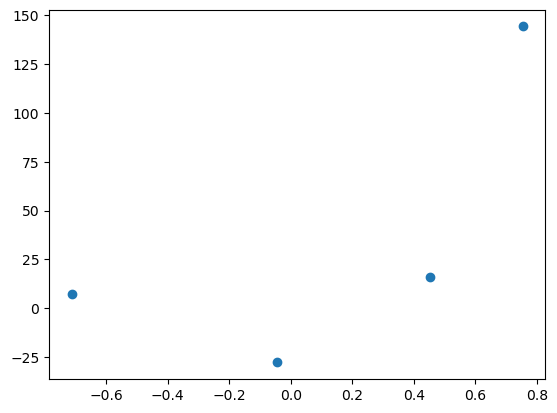

In [3]:
import matplotlib.pyplot as plt 
plt.scatter(X, y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
reg =  LinearRegression()
reg.fit(X, y)

LinearRegression()

In [6]:
reg.coef_

array([78.35063668])

In [7]:
reg.intercept_

26.15963284313262

In [9]:
y_pred = ((78.35 * X) + 0).reshape(4)

In [10]:
m = 78.35
b = 0

loss_slope = -2*np.sum(y - m*X.ravel() - b)
loss_slope

-209.27763408209216

In [11]:
lr =  0.1

step_size = lr*loss_slope
step_size

-20.927763408209216

In [48]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [62]:
lr= LinearRegression()

In [63]:
lr.fit(X_train, y_train)

LinearRegression()

In [64]:
print(lr.coef_)
print(lr.intercept_)

[78.44816886]
1.4298816668013306


In [68]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.823326442472179

In [69]:
np.mean(cross_val_score(lr, X, y, scoring='r2', cv=10))

0.887279681975183

In [53]:
m = 66.97

In [66]:
class GDRegressor: 
    def __init__(self, learning_rate, epochs): 
        self.m = 100
        self.b = -120
        self.lr = learning_rate 
        self.epochs = epochs

    def fit(self, X, y):
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m, self.b)
    
    def predict(self, X): 
        return self.m * X + self.b

In [70]:
gd = GDRegressor(0.001, 100)

In [71]:
gd.fit(X_train, y_train)

78.44840680686823 1.4297717892533617


In [72]:
gd.predict(X_test)

array([[  -3.8845564 ],
       [   1.76722986],
       [-114.37431783],
       [  65.89336974],
       [  94.10475606],
       [ -17.29250553],
       [  64.24041648],
       [ -83.55215721],
       [ -58.70811638],
       [ 131.16927488],
       [  -6.71485325],
       [ -43.34171162],
       [ -22.23959932],
       [ -30.23794401],
       [  42.20529537],
       [ -73.06098604],
       [ -58.48148826],
       [  51.40978687],
       [  17.19869955],
       [-110.32196911]])

In [73]:
y_pred = gd.predict(X_test)
r2_score(y_test, y_pred)

0.823325332892332